# For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

## Questions
- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

### Question 1 Hypothesis 
Do smokers have higher insurance charges than non-smokers? 

Null Hypothesis H0: There is no difference between charges for non-smokers and smokers 

Alternate Hypothesis H1: There is a  difference in charges for  smokers and non-smokers 

Data Type: Numeric 

### Question 2 Hypothesis 
Are men more likely to smoke than women?

Null Hypothesis H0: There is no difference, Men and Women are both just as likely to be smokers 

Alternate Hypothesis H1: There is a difference in the probability of Men and Women smoking. 

Data Type: Categorical 

 ### Question 3 Hypothesis 
 
 Do different regions have different charges, on average?
 
 Null Hypothesis H0: There is no difference in charges by region. 
 
Alternate Hypothesis H1: There is a difference in the charges by region. 
 

Data Type : Categorical 

In [1]:

import pandas as pd
import numpy as np
import json 
import seaborn as sns 
import matplotlib.pyplot as plt 

import scipy.stats as stats

import scipy
scipy.__version__

'1.8.1'

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Question 1 Hypothesis
**Do smokers have higher insurance charges than non-smokers?**

* Null Hypothesis H0: There is no difference between charges for non-smokers and smokers

* Alternate Hypothesis H1: There is a difference in charges for smokers and non-smokers

* Data Type: Numeric

# Determine the correct test to perform.
* Type of Data?

**Numeric**

* How many groups/samples?

**2**
* Therefore, which test is appropriate?

**2-sample T-Test**

# Visualize and separate data for hypothesis

* What column is our target?

The **Charges** column 

* What column determines our groups?

The **smoker** column 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#check column that contains our measurment display value counts 
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [5]:
#check column that will help us seperate by group
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='Count'>

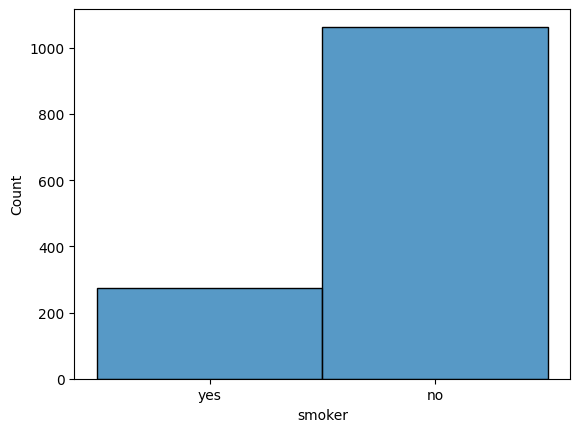

In [6]:
#Display the visualization for the column that will seperate by group 

sns.histplot(data=df, x='smoker')

In [7]:
df['has_smoker'] = df['smoker'].str.contains('yes')
df['has_smoker'].value_counts(normalize=True)

False    0.795217
True     0.204783
Name: has_smoker, dtype: float64

In [8]:
df['has_smoker'].value_counts()

False    1064
True      274
Name: has_smoker, dtype: int64

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges,has_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,True
1,18,male,33.770,1,no,southeast,1725.55230,False
2,28,male,33.000,3,no,southeast,4449.46200,False
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


In [10]:
# save a list of columns needed for the smokers group 
needed_cols = ['has_smoker','charges']
needed_cols

['has_smoker', 'charges']

In [11]:
# save a list of columns needed for the non-smokers group 
nonsmokers = df.loc[df['has_smoker']==False, needed_cols]
nonsmokers 

,has_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [12]:
# save a list of columns needed for the smokers group 
smokers = df.loc[df['has_smoker']==True, needed_cols]
smokers

,has_smoker,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [13]:
#plot the smokers and non smokers groups 
plot_df =  pd.concat([nonsmokers, smokers])
plot_df

,has_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [14]:
# Save the charges column as the final group variable for each of the groups 
smoker_group = smokers['charges']
nonsmoker_group = nonsmokers['charges']



In [15]:
smoker_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [16]:
nonsmoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

## Now that I have separated the two groups I will need to check that all Test Assumptions are met before proceeding with the 2 Sample T-Test 

# Testing Assumptions for a 2-sample T-Test

* No significant outliers
* Normality
* Equal Variance

# First I need to remove any significant Outliers present in the groups I made. I will save the outliers in a separate variable for each group and then remove them. Then I will save the remaining clean values in a separate clean dataframe for each group. 

In [17]:
## Check the smokers group for outliers
smoker_outliers =  np.abs(stats.zscore(smoker_group)) > 3

## how many outliers?
smoker_outliers.sum()

0

**There are no significant outliers in the smoker group**

In [18]:
len(smoker_group)



274

In [19]:
## Check the nonsmokers group for outliers
nonsmoker_outliers =  np.abs(stats.zscore(nonsmoker_group)) > 3

## how many outliers?
nonsmoker_outliers.sum()

24

In [20]:
len(nonsmoker_group)


1064

In [21]:
## remove the outliers from the nonsmoker_group  
nonsmoker_group_cln = nonsmoker_group[nonsmoker_outliers==False]
nonsmoker_group_cln

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [22]:
smoker_group_cln = smoker_group[smoker_outliers==False]
smoker_group_cln 

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

## Test for Normality


In [23]:
stats.normaltest(nonsmoker_group_cln)

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [24]:
len(nonsmoker_group_cln)

1040

In [25]:
stats.normaltest(smoker_group_cln)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [26]:
len(smoker_group_cln)

274

### Our groups meet the assumption of normality each group is larger than 20 n > 20 

## Test for Equal Variances

** I will use the Levene test to test for equal variances in both groups 

In [27]:
result = stats.levene(nonsmoker_group_cln, smoker_group_cln)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [28]:
#check iif result is less than the p-value 0f 0.05 
result.pvalue < .05

True

In [29]:
final_result =stats.ttest_ind(nonsmoker_group_cln, smoker_group_cln)

In [30]:
final_result.pvalue <.00000001


True

In [31]:
nonsmoker_group_cln.mean()

7939.8608446721155

In [32]:
smoker_group_cln.mean()

32050.23183153284

# Conclusion 
There is a signficant differnce in charges between smokers and non smokers. We have enough evidence to rejeect the Null hypothesis and support the Alternative hypotheesis. There is a difference in charges for smokers and non-smokers.

# Question 2 Hypothesis¶
**Are men more likely to smoke than women?**

* Null Hypothesis H0: There is no difference, Men and Women are both just as likely to be smokers

* Alternate Hypothesis H1: There is a difference in the probability of Men and Women smoking.

* Data Type: Categorical

# Determine the correct test to perform.
Type of Data?

* Categorical 

How many groups/samples?
2

Therefore, which test is appropriate?
* Chi-Square

# Test Assumptions :

* There are two categorical variables (ordinal or nominal)
* The outcomes are independent

# Visualize and separate data for hypothesis¶
1. What column is our target?

* The smoker column

2. What column determines our groups?

* The sex column


In [33]:
#check the values of the sex column 
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [34]:
#check the vales of the smoker column 
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [35]:
#check dataframe info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   has_smoker  1338 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 74.6+ KB


<AxesSubplot:xlabel='sex', ylabel='Count'>

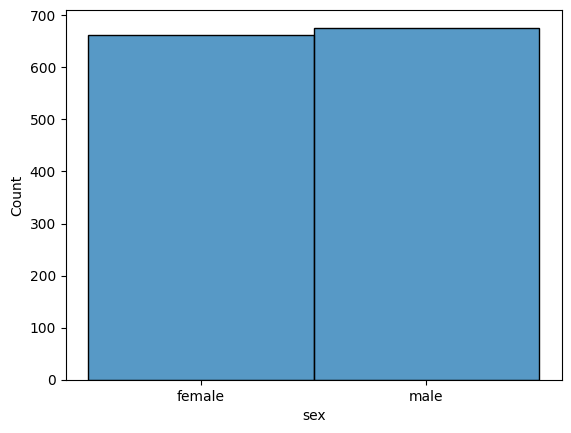

In [36]:
#visualize column we will seperate groups by
sns.histplot(data=df, x='sex')

In [37]:
df['has_male'] = df['sex'].str.contains(('male'))
df['has_male'].value_counts(normalize=True)

True    1.0
Name: has_male, dtype: float64

In [38]:
df['has_male'].value_counts()

True    1338
Name: has_male, dtype: int64

In [39]:
df['has_female'] = df['sex'].str.contains(('female'))
df['has_female'].value_counts(normalize=True)

False    0.505232
True     0.494768
Name: has_female, dtype: float64

In [40]:
df['has_female'].value_counts()

False    676
True     662
Name: has_female, dtype: int64

In [41]:
## save list of columns needed for each group
needed_cols = ['has_male','smoker']

In [42]:
## save male team in separate variable
male_df = df.loc[df['has_female']==False, needed_cols]
male_df 

,has_male,smoker
1,True,no
2,True,no
3,True,no
4,True,no
8,True,no
...,...,...
1324,True,no
1325,True,no
1327,True,no
1329,True,no


In [43]:
## save female team in separate variables
female_df = df.loc[df['has_female']==True, needed_cols]
female_df

,has_male,smoker
0,True,yes
5,True,no
6,True,no
7,True,no
9,True,no
...,...,...
1332,True,no
1334,True,no
1335,True,no
1336,True,no


In [44]:
## Make a df just for visualization by concat the groups 
plot_df =  pd.concat([male_df,female_df])
plot_df

,has_male,smoker
1,True,no
2,True,no
3,True,no
4,True,no
8,True,no
...,...,...
1332,True,no
1334,True,no
1335,True,no
1336,True,no


## Test Assumptions :¶
1. There are two categorical variables (ordinal or nominal)
2.  The outcomes are independent

In [45]:
#Make a Crosstab table 
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [46]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results



In [47]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

# Conclusion 

The p-value is less than .05.  This means that we need to reject the null hypothesis that There is no difference, Men and Women are both just as likely to be smokers. 

# Question 3 Hypothesis
Do different regions have different charges, on average?

Null Hypothesis H0: There is no difference in charges by region.

Alternate Hypothesis H1: There is a difference in the charges by region.

Data Type : Numeric
# Determine the correct test to perform.¶
Type of Data?
* Numeric the charges charged by region 

How many groups/samples? 

* There are 4 regions in the dataframe 

Therefore, which test is appropriate?
* ANOVA/ Tukey Pairwise 

# Test Assumptions :
* No significant outliers
* Normality
* Equal Variance

# Visualize and separate data for hypothesis¶

1. What column is our target?
* The charges column
2. What column determines our groups?
* The regions column

In [48]:
df['region'].nunique()

4

In [49]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

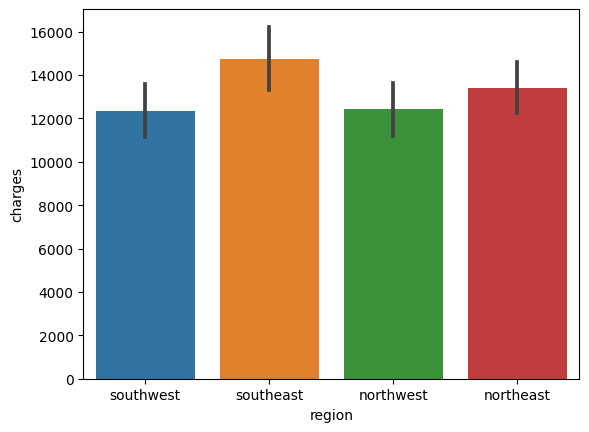

In [50]:
## Make a barplot to visualize the charges for each region 
ax = sns.barplot(data=df, x='region',y='charges')

In [51]:
#Make a variable for all the region names 
region_names = df['region'].unique()
region_names

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [52]:
#Make an empty dict to hold values for our for loop as it iterates throught the regions and charges 
groups = {}

for region in region_names: 
    temp = df.loc[df['region']==region, 'charges']
    
    groups[region] = temp

In [53]:
#check one of the regions to make sure it stored the values of the charges 
groups['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

# Test Assumptions :
* No significant outliers
* Normality
* Equal Variance

# Check for Significant Outliers 

In [60]:
#Create an empty dict to store the values as the for loop iterates through the columns to check for outliers 
groups_clean = {}

#Loop through groups dict
for region_names, group_data in groups.items(): #items is key to unlocking the dict values 
    
    #check for outliers 
    outliers = np.abs(stats.zscore(group_data)) > 3
    
    #Dispaly the number of outliers in each region 
    print(f"There were {outliers.sum()} outliers in {region_names} region")
    
    #remove outliers from data and overwrite region data in a new variable 
    
    groups_data_clean = group_data[outliers==False]
    
    groups_clean[region_names] = groups_data_clean  #Always Make sure that you don't Hardcode any of the variables by using "" or column names 

There were 8 outliers in southwest region
There were 2 outliers in southeast region
There were 7 outliers in northwest region
There were 4 outliers in northeast region


# Test for Normality
**Test the assumption of normality to make sure that each group has more than 20 items per group**


# First Approach 
Check the values in the region column 

In [55]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

**As we can see each region has more than 20. If we want we can ignore the assumption of normality.** 

# Second Approach 
**Make a for loop that loops through all of the region data to ensure that there are more than 20 items per region**

In [56]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for region_names, group_data in groups.items():
    
    ## calculate normaltest results
    result = stats.normaltest(group_data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([region_names, len(group_data), result.pvalue,
                        result.pvalue < .05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
norm_results

[['group', 'n', 'pval', 'sig?'],
 ['southwest', 325, 6.125298236442602e-23, True],
 ['southeast', 364, 4.953296503171451e-15, True],
 ['northwest', 325, 5.1842093710451725e-24, True],
 ['northeast', 324, 1.455431391274411e-19, True]]

In [57]:
result = pd.DataFrame(norm_results[1:], columns=norm_results[0])
result

,group,n,pval,sig?
0,southwest,325,6.125298e-23,True
1,southeast,364,4.953297e-15,True
2,northwest,325,5.184209e-24,True
3,northeast,324,1.455431e-19,True


# Test for Equal Variances


In [82]:
#I will use Levenes test to test for equal variance stats.levene(*groups_clean.values())
result = stats.levene(*groups_clean.values())
print(result)

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)


In [83]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


# The Equal Variance p-value is less than .05 so we can assume that the null hypothesis is incorrect and that we don't have equal variance. I need to run a non-parametric test since I failed one of the test assumptions 

In [62]:
groups_clean

{'southwest': 0       16884.92400
 12       1826.84300
 15       1837.23700
 18      10602.38500
 19      36837.46700
            ...     
 1316     1731.67700
 1329    10325.20600
 1331    10795.93733
 1332    11411.68500
 1336     2007.94500
 Name: charges, Length: 317, dtype: float64,
 'southeast': 1        1725.5523
 2        4449.4620
 5        3756.6216
 6        8240.5896
 11      27808.7251
            ...    
 1322    12981.3457
 1323    43896.3763
 1327     9377.9047
 1330    12629.1656
 1335     1629.8335
 Name: charges, Length: 362, dtype: float64,
 'northwest': 3       21984.47061
 4        3866.85520
 7        7281.50560
 9       28923.13692
 24       6203.90175
            ...     
 1319     7201.70085
 1320     5425.02335
 1324     4239.89265
 1333    10600.54830
 1337    29141.36030
 Name: charges, Length: 318, dtype: float64,
 'northeast': 8        6406.41070
 10       2721.32080
 16      10797.33620
 17       2395.17155
 20      13228.84695
            ...     
 1321

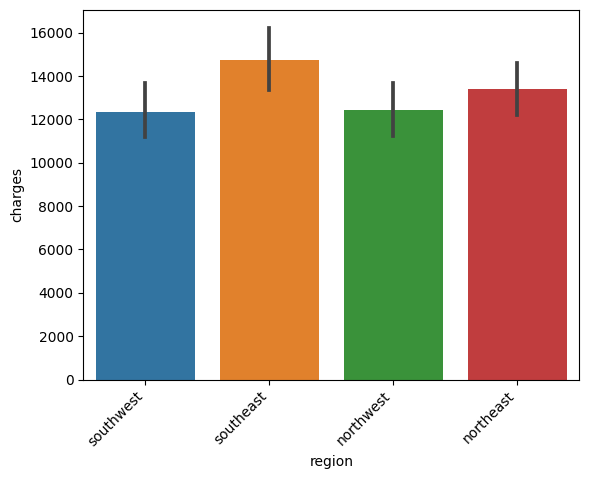

In [72]:
ax = sns.barplot(data=df, x='region', y='charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [84]:
result = stats.kruskal(*groups.values())
print(result)
result.pvalue <.05 

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)


False

# Conclusion
* Our Kruskal Wallis test returned a p-value greater than .05. We reject the alternative hypothesis and conclude that there isn't a significant difference between charges based on regions.